# Team Assignment - the descriptive Task

#### First Step: Importing

In [1]:
# ----------- GPU acceleration - use pandas if you don't got a nvidia gpu -----------
import pandas as pd
#import cudf as pd

# install packages with "conda install -c nvidia -c rapidsai -c numba -c conda-forge -c defaults cudf" 
# only on Linux available
# ----------- GPU acceleration - end -----------
import swifter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")

import folium
from folium import plugins
from folium.plugins import HeatMap
from geopandas.tools import geocode

from datetime import datetime, timedelta

In [2]:
chg17 = pd.read_csv("chicago_2017.csv")

#### Second Step: Validate and review the Data

In [3]:
chg17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3829014 entries, 0 to 3829013
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   start_time          object
 1   end_time            object
 2   start_station_id    int64 
 3   end_station_id      int64 
 4   start_station_name  object
 5   end_station_name    object
 6   bike_id             int64 
 7   user_type           object
dtypes: int64(3), object(5)
memory usage: 233.7+ MB


In [4]:
# chg17.describe()

In [5]:
chg17.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,3/31/2017 23:59:07,4/1/2017 00:13:24,66,171,Clinton St & Lake St,May St & Cullerton St,5292,Subscriber
1,3/31/2017 23:56:25,4/1/2017 00:00:21,199,26,Wabash Ave & Grand Ave,McClurg Ct & Illinois St,4408,Subscriber
2,3/31/2017 23:55:33,4/1/2017 00:01:21,520,432,Greenview Ave & Jarvis Ave,Clark St & Lunt Ave,696,Subscriber
3,3/31/2017 23:54:46,3/31/2017 23:59:34,110,142,Dearborn St & Erie St,McClurg Ct & Erie St,4915,Subscriber
4,3/31/2017 23:53:33,4/1/2017 00:00:28,327,331,Sheffield Ave & Webster Ave,Halsted St & Blackhawk St (*),4247,Subscriber


Let's have a look at empty values

In [6]:
emptyRows = chg17[chg17.isna().any(axis=1)]
emptyRows

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type


In [7]:
countEmptyRows = len(chg17[chg17.isna().any(axis=1)])
print("There are {} empty rows".format(countEmptyRows))

There are 0 empty rows


As you can see, there are none empty Values

## Usage Visualization:

First we aggregate our data and do some calculation before

In [3]:
# Careful, this step takes some minutes
chg17_timeStamps = chg17.copy()
chg17_timeStamps['start_time'] = pd.to_datetime(chg17_timeStamps['start_time'])
chg17_timeStamps['end_time'] = pd.to_datetime(chg17_timeStamps['end_time'])

In [4]:
chg17_timeStamps.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2017-03-31 23:59:07,2017-04-01 00:13:24,66,171,Clinton St & Lake St,May St & Cullerton St,5292,Subscriber
1,2017-03-31 23:56:25,2017-04-01 00:00:21,199,26,Wabash Ave & Grand Ave,McClurg Ct & Illinois St,4408,Subscriber
2,2017-03-31 23:55:33,2017-04-01 00:01:21,520,432,Greenview Ave & Jarvis Ave,Clark St & Lunt Ave,696,Subscriber
3,2017-03-31 23:54:46,2017-03-31 23:59:34,110,142,Dearborn St & Erie St,McClurg Ct & Erie St,4915,Subscriber
4,2017-03-31 23:53:33,2017-04-01 00:00:28,327,331,Sheffield Ave & Webster Ave,Halsted St & Blackhawk St (*),4247,Subscriber


In [21]:
chg17_timeStamps["date"] = chg17_timeStamps["start_time"].swifter.progress_bar(False).apply(lambda x: x.date()) 
chg17_timeStamps["travel_time"] = chg17_timeStamps["end_time"] - chg17_timeStamps["start_time"]
chg17_timeStamps["hour"] = chg17_timeStamps["start_time"].swifter.progress_bar(False).apply(lambda x: x.hour) 
chg17_timeStamps["weekday"] = chg17_timeStamps["start_time"].swifter.progress_bar(False).apply(lambda x: x.weekday()) 
chg17_timeStamps["week"] = chg17_timeStamps["start_time"].swifter.progress_bar(False).apply(lambda x: x.isocalendar()[1]) 
chg17_timeStamps["month"] = chg17_timeStamps["start_time"].swifter.progress_bar(False).apply(lambda x: x.month) 
chg17_timeStamps.sort_values(["date","bike_id"], inplace = True)

In [7]:
chg17_timeStamps.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,travel_time,hour,weekday,week,month
430052,2017-01-01 20:54:49,2017-01-01 21:04:30,27,302,Larrabee St & North Ave,Sheffield Ave & Wrightwood Ave,8,Subscriber,2017-01-01,0 days 00:09:41,20,6,52,1
431086,2017-01-01 12:38:02,2017-01-01 12:41:07,138,27,Clybourn Ave & Division St,Larrabee St & North Ave,8,Subscriber,2017-01-01,0 days 00:03:05,12,6,52,1
431351,2017-01-01 10:33:57,2017-01-01 10:37:29,27,138,Larrabee St & North Ave,Clybourn Ave & Division St,8,Subscriber,2017-01-01,0 days 00:03:32,10,6,52,1
431246,2017-01-01 11:35:55,2017-01-01 11:57:05,116,88,Western Ave & Winnebago Ave,Racine Ave & Randolph St,27,Customer,2017-01-01,0 days 00:21:10,11,6,52,1
430271,2017-01-01 17:45:56,2017-01-01 18:01:38,231,231,Sheridan Rd & Montrose Ave,Sheridan Rd & Montrose Ave,31,Subscriber,2017-01-01,0 days 00:15:42,17,6,52,1


### Let's take a look at different usages
At first some usage data over the year

In [8]:
chg17_usage = chg17_timeStamps.groupby(["date"])["bike_id"].count()
chg17_usage = pd.DataFrame(chg17_usage)

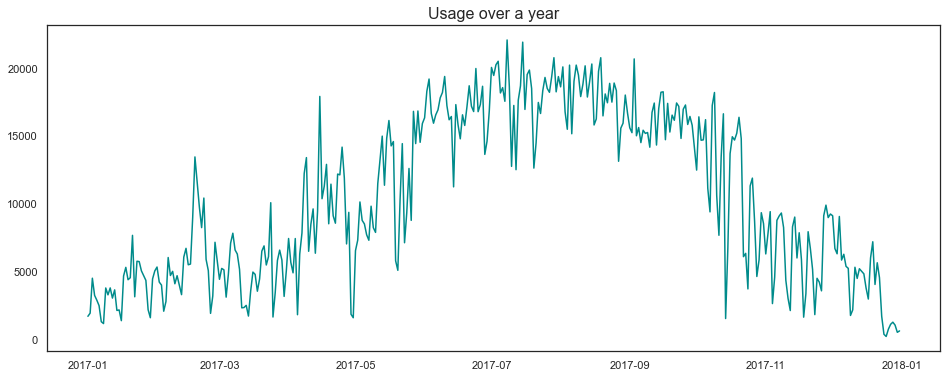

In [9]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(chg17_usage, color='darkcyan')

ax.set_title("Usage over a year", fontsize=16)
plt.show()

Breaking this into our to costumer types: costumer, subscriber.

For simplicity reasons we are grouping by week now

In [10]:
data_range = pd.date_range('2017-01-01', '2017-12-31')

In [11]:
chg17_usage = chg17_timeStamps.groupby(["week"])["bike_id"].count()
chg17_usage = pd.DataFrame(chg17_usage)

In [12]:
chg17_usage_subs = chg17_timeStamps[chg17_timeStamps["user_type"]=="Subscriber"].groupby(["week"])["bike_id"].count()
chg17_usage_subs = pd.DataFrame(chg17_usage_subs)

In [13]:
chg17_usage_costu = chg17_timeStamps[chg17_timeStamps["user_type"]=="Customer"].groupby(["week"])["bike_id"].count()
chg17_usage_costu = pd.DataFrame(chg17_usage_costu)

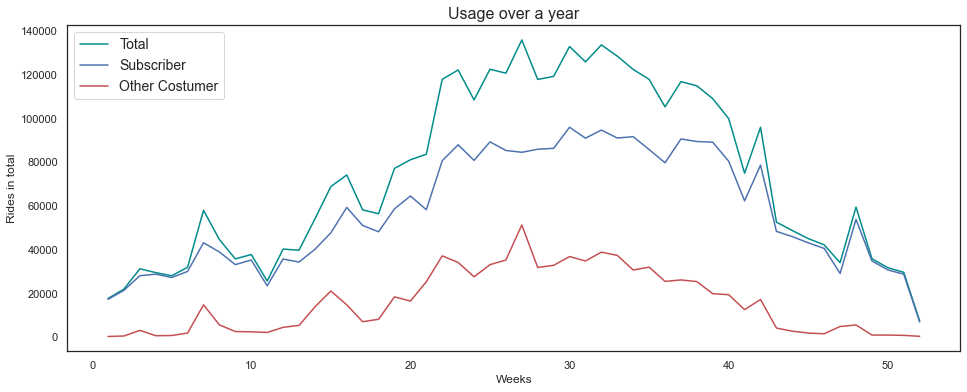

In [14]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(chg17_usage, label="Total", color='darkcyan')
ax.plot(chg17_usage_subs, label="Subscriber", color='b')
ax.plot(chg17_usage_costu, label="Other Costumer", color='r')

ax.set_title("Usage over a year", fontsize=16)
ax.set_ylabel("Rides in total")
ax.set_xlabel("Weeks")
ax.legend(fontsize=14, loc="upper left")
plt.show()

In [15]:
chg17_usage = chg17_timeStamps.groupby(["date","month"])["bike_id"].count()
chg17_usage = pd.DataFrame(chg17_usage)

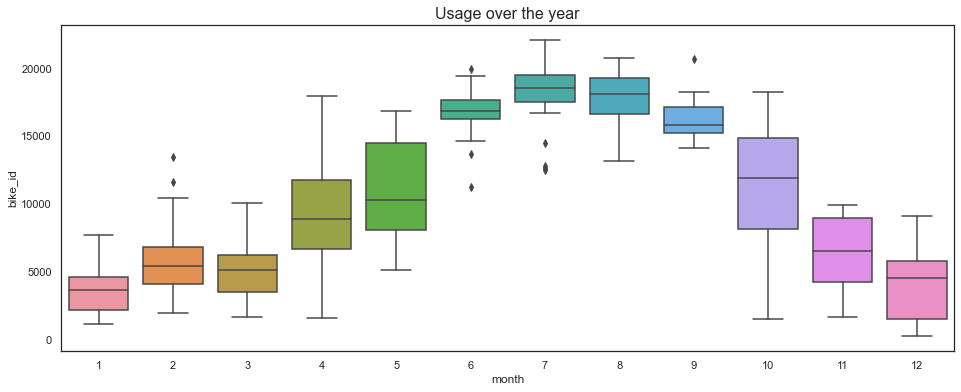

In [16]:
fig, ax = plt.subplots(figsize=(16,6))

sns.boxplot(x = chg17_usage.index.get_level_values(1),
            y = chg17_usage["bike_id"],
            ax=ax)
ax.set_title("Usage over the year", fontsize=16)
plt.show()

Then we take a look at some usage data per individual day. We compare each week day to each other

In [17]:
chg17_usage = chg17_timeStamps.groupby(["date","weekday"])["bike_id"].count()
chg17_usage = pd.DataFrame(chg17_usage)

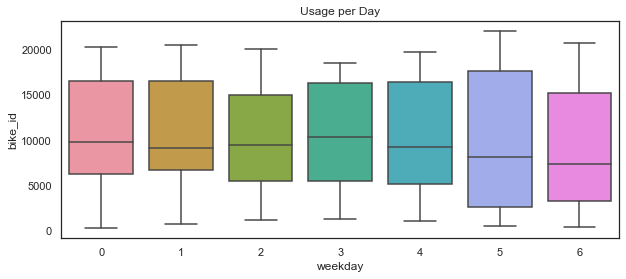

In [18]:
fig, ax = plt.subplots(figsize=(10,4))

sns.boxplot(x = chg17_usage.index.get_level_values(1),
            y = chg17_usage["bike_id"],
            ax=ax)
ax.set_title("Usage per Day")
plt.show()

We continue with some analyses of the usage over the day

In [19]:
chg17_usage = chg17_timeStamps.groupby(["date","hour"])["bike_id"].count()
chg17_usage = pd.DataFrame(chg17_usage)

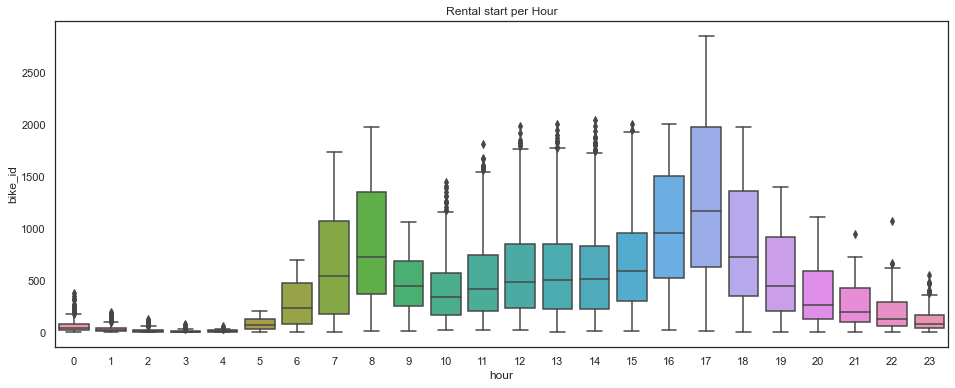

In [20]:
fig, ax = plt.subplots(figsize=(16,6))

sns.boxplot(x = chg17_usage.index.get_level_values(1),
            y = chg17_usage["bike_id"],
            ax=ax)
ax.set_title("Rental start per Hour")
plt.show()

### We now take a look at availability time
#### Time where the product is not in use is often very important

Here are the station's:

In [23]:
chg17_stations = chg17.copy()

In [24]:
def getLocation(x):
    try:
        location = geocode(x, provider="nominatim", user_agent='my_request')
        point = location.geometry.iloc[0]
        return f"({round(point.y, 4)}, {round(point.x, 4)})"
    except:
        return 'NaN'

In [25]:
geocode("Märchenstraße 25", provider="nominatim", user_agent='my_request')["geometry"]

0    POINT (7.05897 50.97186)
Name: geometry, dtype: geometry

In [26]:
UniqueAdresses = chg17['start_station_name'].unique()
locDict = dict(zip(UniqueAdresses, pd.Series(UniqueAdresses).apply(lambda x: getLocation(x))))
locDict

{'Clinton St & Lake St': '(41.8856, -87.6415)',
 'Wabash Ave & Grand Ave': '(41.8917, -87.6269)',
 'Greenview Ave & Jarvis Ave': '(42.016, -87.6684)',
 'Dearborn St & Erie St': '(41.894, -87.6294)',
 'Sheffield Ave & Webster Ave': '(41.9217, -87.6537)',
 'Sedgwick St & Webster Ave': '(41.9221, -87.6389)',
 'Daley Center Plaza': '(41.8842, -87.6296)',
 'Desplaines St & Kinzie St': '(41.8887, -87.6444)',
 'Ashland Ave & Division St': '(41.9035, -87.6678)',
 'Wilton Ave & Belmont Ave': '(41.9401, -87.653)',
 'Southport Ave & Waveland Ave': '(41.9481, -87.6639)',
 'Wabash Ave & Roosevelt Rd': '(41.8672, -87.626)',
 'Sheffield Ave & Fullerton Ave': '(41.9256, -87.6537)',
 'Ashland Ave & Blackhawk St': '(41.9071, -87.6673)',
 'Clinton St & Madison St': '(41.8822, -87.6411)',
 'Millennium Park': '(41.8826, -87.6225)',
 'Clark St & Lake St': '(41.886, -87.6309)',
 'Clinton St & Washington Blvd': '(41.8835, -87.6412)',
 'Damen Ave & Pierce Ave': '(41.9094, -87.6777)',
 'McClurg Ct & Illinois St

In [22]:
UniqueAdresses2 = chg17['end_station_name'].unique()
locDict2 = dict(zip(UniqueAdresses2, pd.Series(UniqueAdresses2).apply(lambda x: getLocation(x))))
locDict2

May St & Cullerton St
McClurg Ct & Illinois St
Clark St & Lunt Ave
McClurg Ct & Erie St
Halsted St & Blackhawk St (*)
Wells St & Concord Ln
Federal St & Polk St
Clinton St & Madison St
Damen Ave & Pierce Ave
Noble St & Milwaukee Ave
Broadway & Cornelia Ave
Buckingham Fountain
Ashland Ave & Wellington Ave
Ashland Ave & Division St
Wells St & Polk St
Fairbanks Ct & Grand Ave
Wells St & Elm St
Damen Ave & Charleston St
Franklin St & Lake St
Halsted St & 18th St
Michigan Ave & Madison St
Clark St & Wrightwood Ave
Clark St & Lincoln Ave
Clark St & Chicago Ave
Stetson Ave & South Water St
Clinton St & Tilden St
Sheffield Ave & Wellington Ave
Marshfield Ave & Cortland St
Sheridan Rd & Irving Park Rd
Ritchie Ct & Banks St
Lake Shore Dr & Ohio St
Ravenswood Ave & Lawrence Ave
Wabash Ave & 8th St
Clark St & Bryn Mawr Ave
Aberdeen St & Jackson Blvd
Damen Ave & Division St
Larrabee St & Menomonee St
Leavitt St & Armitage Ave
Daley Center Plaza
Larrabee St & Armitage Ave
Albany Ave & Bloomingdale A

Loomis St & Archer Ave
Forest Ave & Chicago Ave
Ravenswood Ave & Irving Park Rd
900 W Harrison St
Racine Ave & 13th St
Greenview Ave & Jarvis Ave
Milwaukee Ave & Rockwell St
LaSalle St & Adams St
Leavitt St & North Ave
Damen Ave & Cullerton St
Lake Shore Dr & Belmont Ave
Hermitage Ave & Polk St
Western Ave & Howard St
Ashland Ave & Archer Ave
Greenview Ave & Diversey Pkwy
Orleans St & Elm St (*)
Lake Park Ave & 35th St
Ravenswood Ave & Berteau Ave
Clark St & Touhy Ave
Kilbourn Ave & Irving Park Rd
Wisconsin Ave & Madison St
Lincoln Ave & Belmont Ave
Morgan Ave & 14th Pl
Carpenter St & Huron St
Ashland Ave & Wrightwood Ave
Oakley Ave & Touhy Ave
Greenview Ave & Fullerton Ave
Lombard Ave & Madison St
Calumet Ave & 21st St
Lincoln Ave & Fullerton Ave
Wacker Dr & Washington St
Elston Ave & Wabansia Ave
Sheridan Rd & Greenleaf Ave
Eastlake Ter & Rogers Ave
Broadway & Thorndale Ave
Southport Ave & Belmont Ave
Ogden Ave & Congress Pkwy
Monticello Ave & Irving Park Rd
Elmwood Ave & Austin St
S

{'May St & Cullerton St': '(41.8552, -87.6542)',
 'McClurg Ct & Illinois St': '(41.891, -87.6173)',
 'Clark St & Lunt Ave': '(42.0091, -87.6742)',
 'McClurg Ct & Erie St': '(41.8944, -87.6178)',
 'Halsted St & Blackhawk St (*)': '(41.9087, -87.6483)',
 'Wells St & Concord Ln': '(41.9122, -87.6347)',
 'Federal St & Polk St': '(41.8721, -87.6296)',
 'Clinton St & Madison St': '(41.8822, -87.6411)',
 'Damen Ave & Pierce Ave': '(41.9094, -87.6777)',
 'Noble St & Milwaukee Ave': '(41.9007, -87.6626)',
 'Broadway & Cornelia Ave': '(41.9455, -87.6459)',
 'Buckingham Fountain': '(41.8758, -87.619)',
 'Ashland Ave & Wellington Ave': '(41.9361, -87.6698)',
 'Ashland Ave & Division St': '(41.9035, -87.6678)',
 'Wells St & Polk St': '(41.8724, -87.6335)',
 'Fairbanks Ct & Grand Ave': '(41.8919, -87.6206)',
 'Wells St & Elm St': '(41.9033, -87.6344)',
 'Damen Ave & Charleston St': '(41.9201, -87.6779)',
 'Franklin St & Lake St': '(41.8858, -87.6355)',
 'Halsted St & 18th St': '(41.8575, -87.6463)',

In [23]:
set(locDict.keys()) == set(locDict2.keys())

True

In [27]:
chg17_stations['start_station_coordinates'] = chg17_stations['start_station_name'].map(UniqueAdresses)

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
chg17_stations.head()

In [ ]:
chg17_stations_map = folium.Map(location=(48.76507, 9.25371),  tiles='Stamen Toner', 
                       zoom_start=12, control_scale=True, max_zoom=20)

for station in chg17_stations:
    folium.CircleMarker(radius=10, location=station, popup='The Waterfront', 
                                 color='crimson', fill_color='crimson').add_to(chg17_stations_map)

In [ ]:
chg17_bikes = chg17["bike_id"].nunique()
chg17_bikes

In [ ]:
chg17_avail = chg17_timeStamps.copy()

In [ ]:
chg17_avail.sort_values(["bike_id","date"], inplace=True)

In [ ]:
chg17_avail.head()

In [ ]:
chg17_avail2 = chg17_avail.groupby(["date","bike_id"])["travel_time"].sum()
chg17_avail2 = pd.DataFrame(chg17_avail2)
chg17_avail2.head(20)